In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.__version__

'2.2.2'

In [283]:
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv"
df = pd.read_csv(url)
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [284]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df = df[['ram','storage','screen','final_price']]
df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


<Axes: xlabel='final_price', ylabel='Count'>

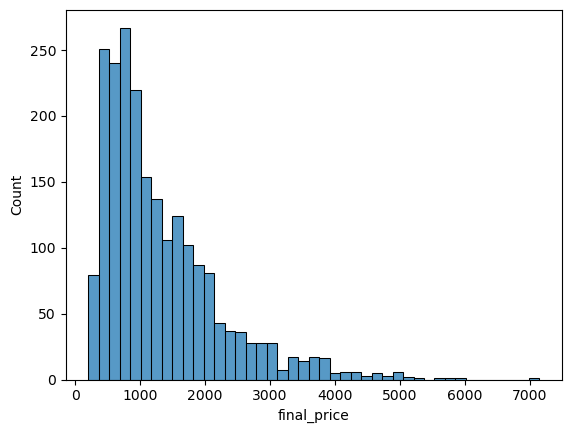

In [285]:
sns.histplot(df.final_price)

final_price does indeed have a long tail as we can see above

In [81]:
print(df.isnull().sum())

ram            0
storage        0
screen         4
final_price    0
dtype: int64


In [286]:
median_ram = df['ram'].median()
print(str(median_ram))

16.0


## Validation Framework

In [287]:
n = len(df)

n_val = int(n * 0.2)
n_test = int (n * 0.2)
n_train = n - n_val - n_test

n_val, n_test, n_train

(432, 432, 1296)

In [290]:
#Shuffle the dataset:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [294]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

y = df["final_price"].values
y_train = y[idx[:n_train]]
y_val = y[idx[n_train:n_train+n_val]]
y_test = y[idx[n_train+n_val:]]

In [295]:
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [298]:
df_train = df_train.reset_index(drop=True)
df_val =df_val.reset_index(drop=True)
df_test =df_test.reset_index(drop=True)

In [75]:
#y_train = np.log1p(df_train.final_price.values)
#y_val = np.log1p(df_val.final_price.values)
#y_test = np.log1p(df_test.final_price.values)

In [87]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [299]:
len(y_train)

1296

#### Function to prepdataset for question 5

In [324]:
def prep_dataset(df, seed):
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    y = df["final_price"].values
    y_train = y[idx[:n_train]]
    y_val = y[idx[n_train:n_train+n_val]]
    y_test = y[idx[n_train+n_val:]]

    return df_train, df_val, df_test, y_train, y_val, y_test

## Training the model and getting our weights

In [314]:
def train_linear_regression(X, y, r =0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [275]:
X_train = df_train.values
mean_screen_size = df_train['screen'].mean()
print(mean_screen_size)
X_train_mean = df_train.fillna(mean_screen_size).values
X_train_zeroes = df_train.fillna(0).values

15.163534416086618


In [306]:
w0, w = train_linear_regression(X_train_mean, y_train)

In [312]:
y_pred = w0 + X_train.dot(w)
y_pred

array([2380.46558232,  403.2369882 , 2452.75795532, 1356.64198269,
       2362.39248907, 1677.94164887, 1314.55784117,  901.45972978,
       1937.17253672, 2303.65493601, 1252.72169651, 4593.60998424,
        901.45972978,  973.75210278, 1659.86855562,  678.39352527,
        901.45972978,  822.97827126,  901.45972978, 1252.72169651,
       1677.94164887, 1750.23402186, 1252.72169651, 1659.86855562,
       2317.20975595, 1750.23402186, 1677.94164887,  768.75899151,
        678.39352527, 2362.39248907, 1325.01406951, 2380.46558232,
        678.39352527,  407.75526152, 1601.13100256, 1315.97752288,
       1314.55784117, 2303.65493601,  901.45972978,  883.38663654,
       1252.72169651, 1234.64860326,  901.45972978, 1677.94164887,
        901.45972978,  678.39352527,  901.45972978, 1252.72169651,
        678.39352527,  782.31381145, 1147.13059812, 4638.79271737,
       1741.19747524, 2272.02702283, 1252.72169651,  797.29236194,
       1659.86855562, 2272.02702283,  901.45972978, 1038.69203

<Axes: ylabel='Count'>

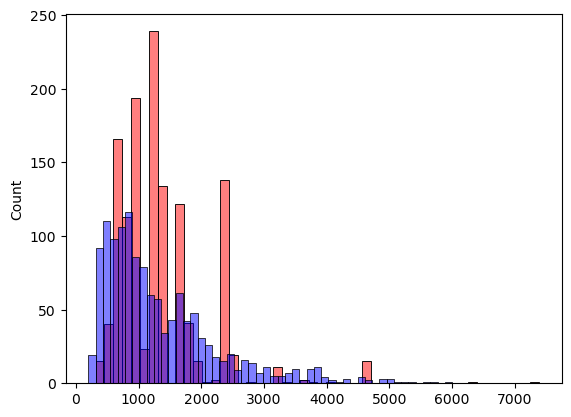

In [308]:
sns.histplot(y_pred, color='red', alpha = 0.5, bins = 50)
sns.histplot(y_train, color ='blue', alpha = 0.5, bins=50)

## RMSE

In [328]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [313]:
rmse(y_train,y_pred)

602.1844959403247

## Validation

In [315]:
def prepare_X(df):
    base = ['ram','storage','screen']
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [302]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

round(rmse(y_val, y_pred), 2)

597.36

In [305]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

round(rmse(y_val, y_pred),2)

600.27

## Regularization

In [319]:
r_values = [0,0.01,1,10,100]

for r in r_values:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train, r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    
    print('RMSE for r=' + str(r) + ':     ' + str(round(rmse(y_val, y_pred), 2)))

RMSE for r=0:     597.36
RMSE for r=0.01:     597.36
RMSE for r=1:     597.21
RMSE for r=10:     597.06
RMSE for r=100:     597.9


In [330]:
seeds = [0,1,2,3,4,5,6,7,8,9]
rmse_list = []

#    return df_train, df_val, df_test, y_train, y_val, y_test
for seed in seeds:
    df_train, df_val, df_test, y_train, y_val, y_test = prep_dataset(df, seed)
    
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train, 0.001)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)  

    rmse_val = round(rmse(y_val, y_pred), 2)
    
    print('RMSE for seed=' + str(seed) + ':     ' + str(rmse_val))
    rmse_list.append(rmse_val)

std = np.std(rmse_list)
std

RMSE for seed=0:     565.45
RMSE for seed=1:     636.8
RMSE for seed=2:     588.96
RMSE for seed=3:     597.81
RMSE for seed=4:     571.96
RMSE for seed=5:     573.24
RMSE for seed=6:     647.34
RMSE for seed=7:     550.44
RMSE for seed=8:     587.33
RMSE for seed=9:     576.1


29.176152950654732

In [367]:
#Question 6

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train + n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
y = df["final_price"].values
y_train = y[idx[:n_train + n_val]]
y_test = y[idx[n_train + n_val:]]

X_train = prepare_X(df_train)
X_test = prepare_X(df_test)

w0, w = train_linear_regression(X_train, y_train, 0.001)
y_hat_test = w0 + X_test.dot(w)

rmse_val = round(rmse(y_hat_test, y_test), 2)
    
print('RMSE= ' + str(rmse_val))

RMSE= 608.61
